In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Data Collection & Processing

In [2]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [3]:
calories.head()
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
# Combining these two datasets
calories_data = pd.concat([exercise,calories['Calories']],axis = 1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
calories_data.shape

(15000, 9)

In [9]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Analysis

In [11]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<Axes: xlabel='Gender', ylabel='count'>

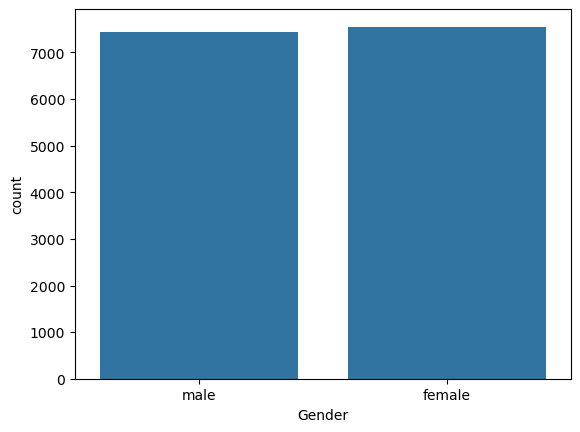

In [13]:
sns.countplot(x='Gender' ,data = calories_data)

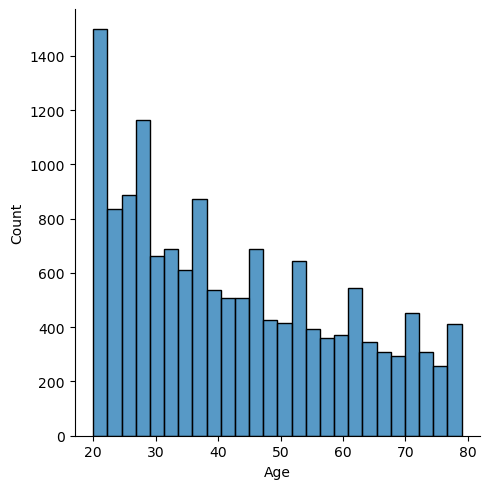

In [14]:
sns.displot(calories_data['Age'])

C:\Users\KRISHNA CHAURASIA\AppData\Local\Temp\ipykernel_11852\2430521470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

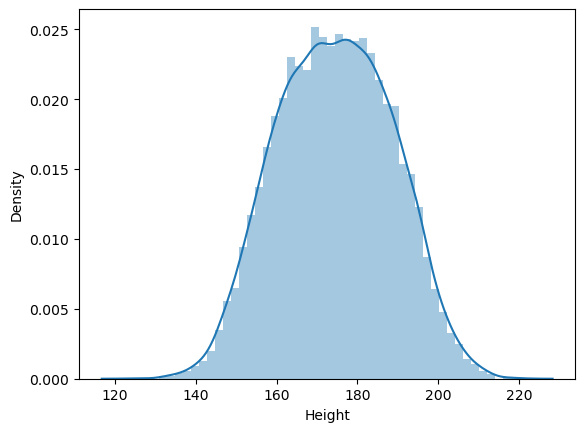

In [15]:
sns.distplot(calories_data['Height'])

C:\Users\KRISHNA CHAURASIA\AppData\Local\Temp\ipykernel_11852\1539919118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

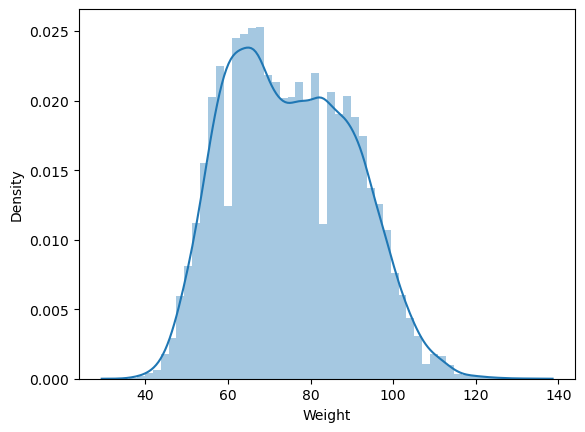

In [16]:
sns.distplot(calories_data['Weight'])

In [17]:
# Finding correlation in the dataset
correlation = calories_data.corr()

ValueError: could not convert string to float: 'male'

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # Apply Label Encoding to the categorical column
# calories_data['gender_encoded'] = label_encoder.fit_transform(calories_data['Gender'])

# # Check the mapping
# print(label_encoder.classes_)  # ['female', 'male']

# # Now use the encoded column for correlation
# numeric_data = calories_data.select_dtypes(include=[float, int])
# correlation = numeric_data.corr()

In [18]:
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)

C:\Users\KRISHNA CHAURASIA\AppData\Local\Temp\ipykernel_11852\4141133196.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)


<Axes: >

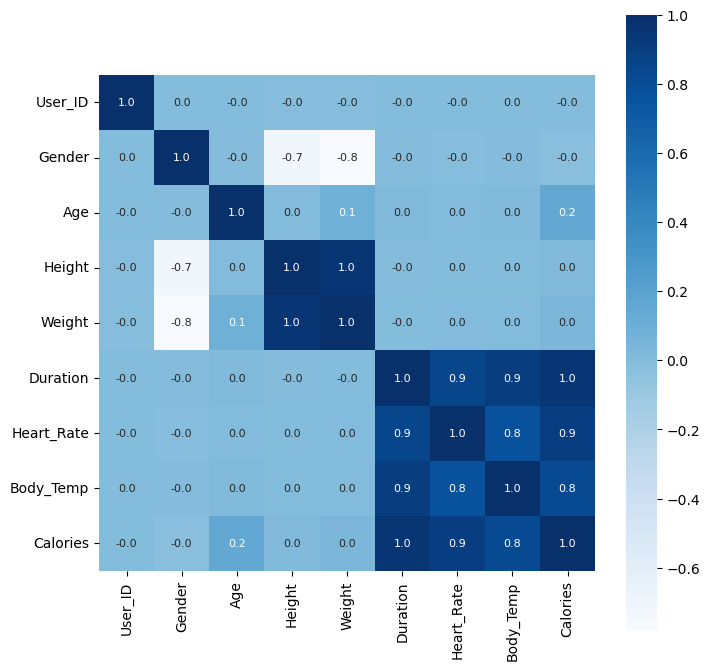

In [20]:
plt.figure(figsize=(8,8))
correlation = calories_data.corr()
sns.heatmap(correlation,cbar=True, square= True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
#cbar --> displays the color bar alongside the heatmap
#square --> Makes each cell in the heatmap a square, ensuring a neat and proportional grid layout
#fmt --> 0.1f means the values will be displayed with one decimal place
#annot --> Enables annotation in each cell of the heatmap
#annot_kws --> customises the appearance of the annotations

In [21]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [22]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
y = calories_data['Calories']
# X represents features and y represents target

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [25]:
#Now Model Training
model = XGBRegressor()

In [26]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
test_data_prediction = model.predict(X_test)

In [28]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [30]:
#Mean Absolute Error
mae = metrics.mean_absolute_error(y_test,test_data_prediction)

In [31]:
print("Mean Absolute Error : ", mae)

Mean Absolute Error :  1.4833678883314132


In [34]:
calories_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,1,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,1,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,0,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,0,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,1,26,146.0,51.0,16.0,90.0,40.2,72.0


# Predictive System

In [48]:
import numpy as np
# input_data = np.array([0,41,175,85,25,100,40.7]).reshape(1,-1)
input_data = np.array([1,30,160,60,12,105,36.9]).reshape(1,-1)
predicted_calories = model.predict(input_data)

In [49]:
predicted_calories

array([71.905685], dtype=float32)

In [50]:
print(f"Predicted Calories Burnt: {predicted_calories[0]:.2f}")

Predicted Calories Burnt: 71.91
